In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
%matplotlib inline
import warnings
from sklearn.preprocessing import StandardScaler, MinMaxScaler 


warnings.filterwarnings('ignore')

In [39]:
#from sklearn.ensemble import RandomForestClassifier,
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report,plot_confusion_matrix

In [8]:
df_test= pd.read_csv("test.csv")

In [9]:
df= pd.read_csv("train.csv")

In [12]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [11]:
df.shape

(103904, 25)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

# DF Preprocessing

In [14]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

#### Since there are nulls in Arrival Delay in Minutes, I am dropping those rows

In [15]:
df=df.dropna(how ='any')

In [16]:
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

### Dropping ID and UnNamed column

In [17]:
df= df.drop(['Unnamed: 0', 'id'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  object 
 1   Customer Type                      103594 non-null  object 
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    1035

lets check if there are any duplicate values

In [18]:

df.duplicated().sum()


0

check for unique entries in satisfaction column

In [19]:
df.satisfaction.unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [20]:

df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


## EDA

In [21]:

df.satisfaction.value_counts()

neutral or dissatisfied    58697
satisfied                  44897
Name: satisfaction, dtype: int64

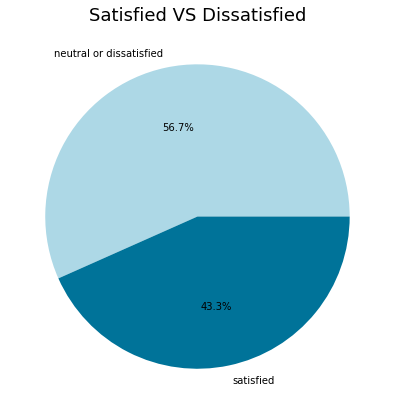

In [24]:
labels = df.satisfaction.value_counts().index
sizes = df.satisfaction.value_counts()
plt.figure(figsize = (7,7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors = ['#ADD8E6','#007399'])
plt.title('Satisfied VS Dissatisfied',color = 'black',fontsize = 18);

From the above pie chart we can say Dataset is Balanced

In [26]:
cat_cols = [ 'Inflight wifi service','Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service','Cleanliness','Gender','Customer Type','Type of Travel','Class']

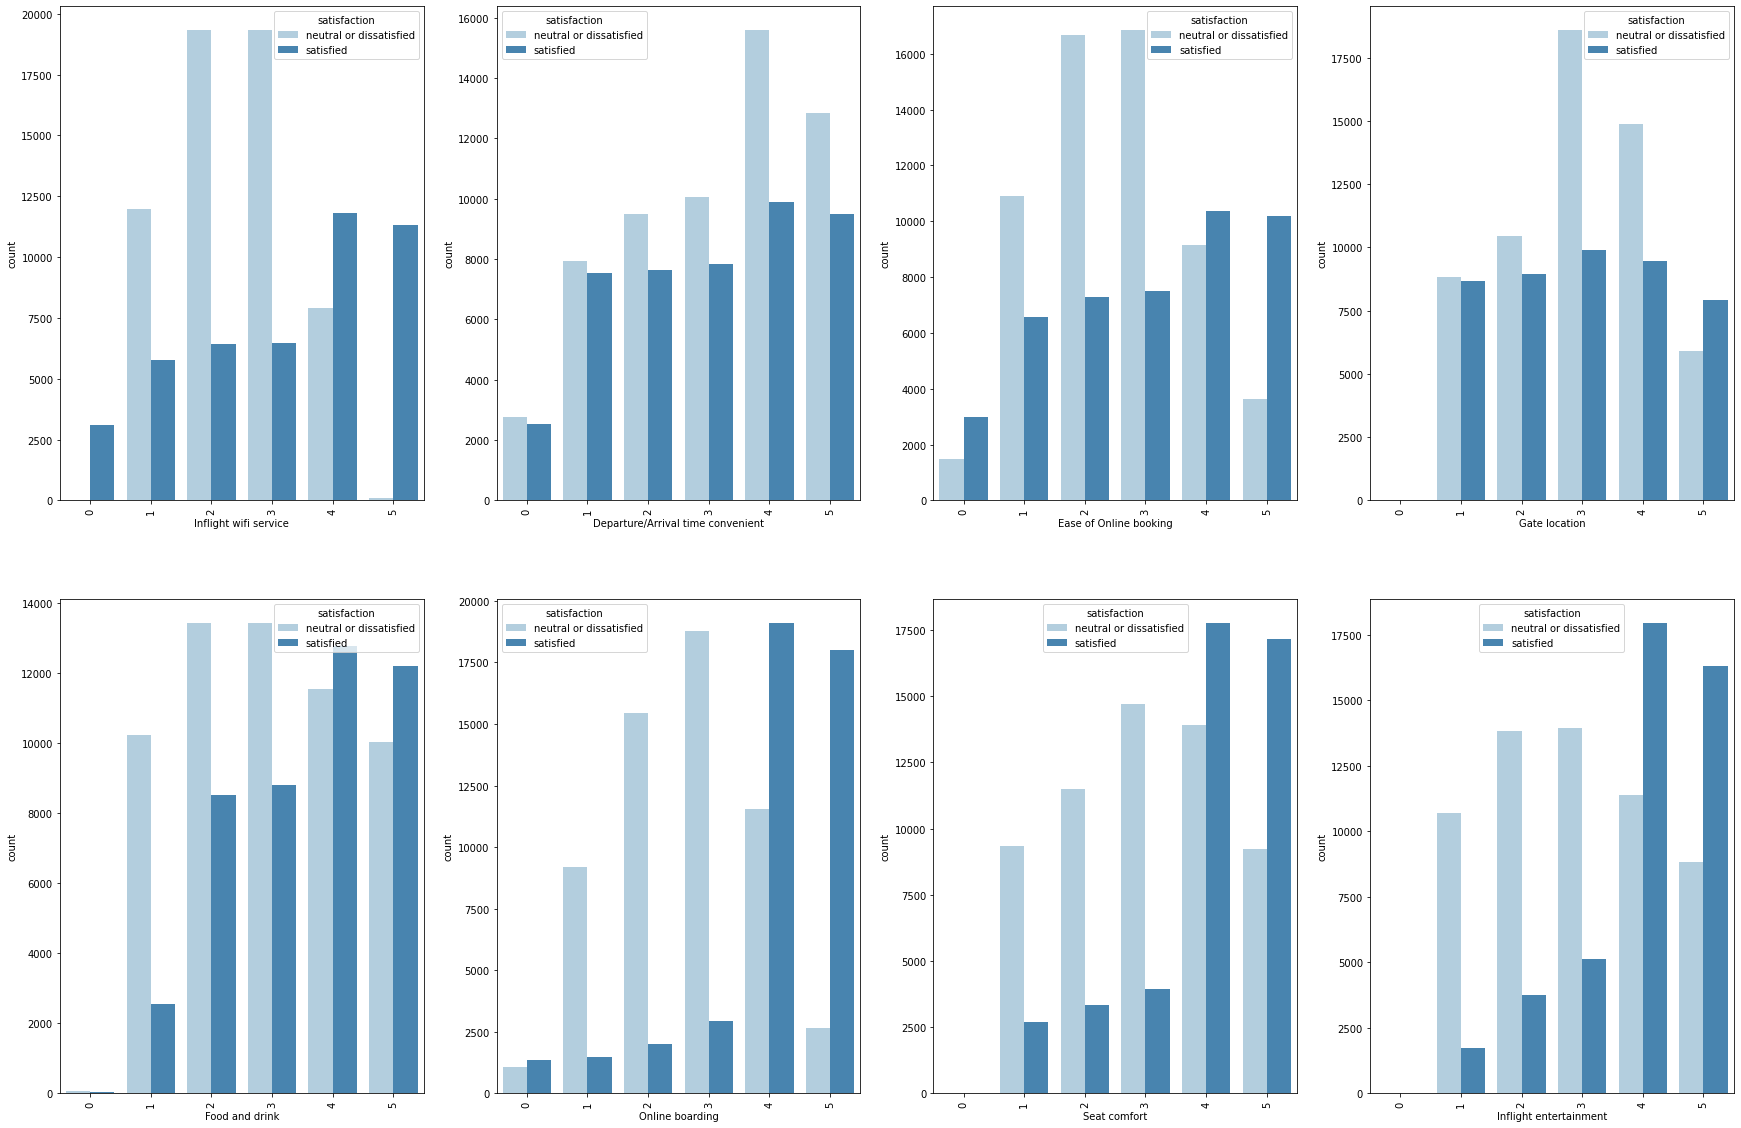

In [27]:
fig, ax = plt.subplots(2, 4, figsize=(30, 20))
for variable, subplot in zip(cat_cols[:8], ax.flatten()):
    sns.countplot(df[variable],hue=df['satisfaction'], ax=subplot, palette='Blues')
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

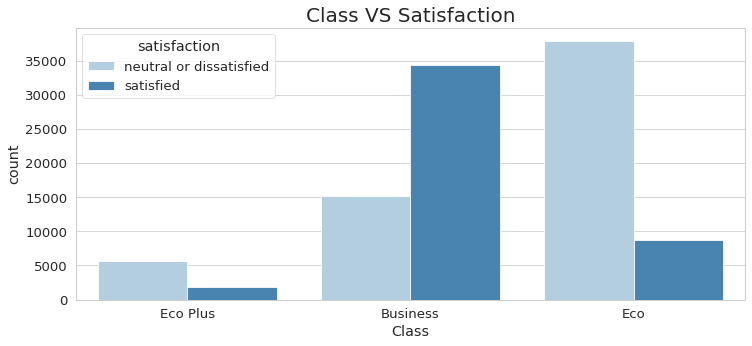

In [31]:
plt.figure(figsize=(12,5))
sns.countplot(x='Class', hue="satisfaction", data=df,palette="Blues").set_title('Class VS Satisfaction', fontsize=20);

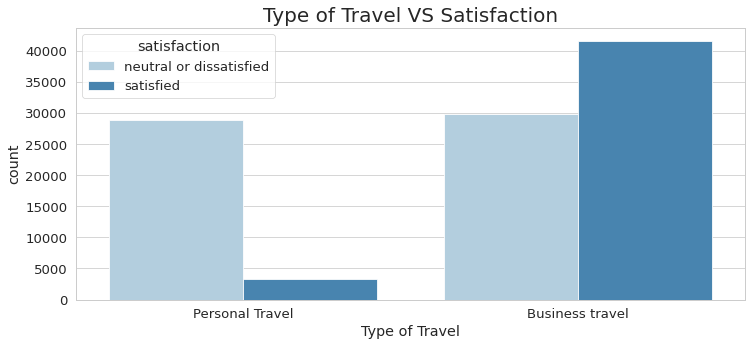

In [32]:
plt.figure(figsize=(12,5))
sns.countplot(x='Type of Travel', hue="satisfaction", data=df,palette="Blues").set_title('Type of Travel VS Satisfaction', fontsize=20);

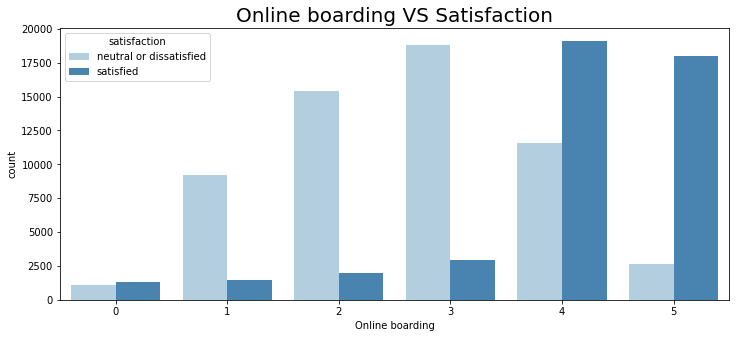

In [28]:
plt.figure(figsize=(12,5))
sns.countplot(x='Online boarding', hue="satisfaction", data=df,palette="Blues").set_title('Online boarding VS Satisfaction', fontsize=20);

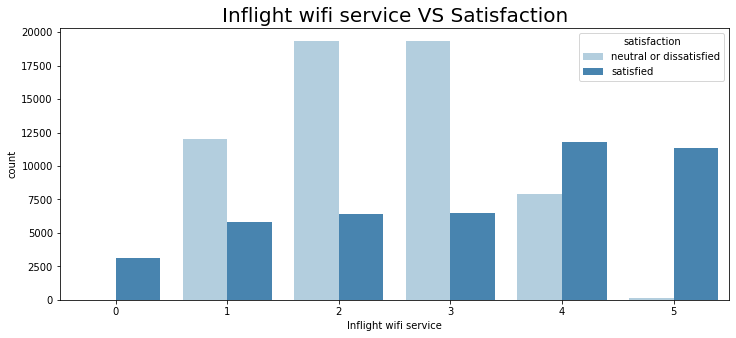

In [29]:
plt.figure(figsize=(12,5))
sns.countplot(x='Inflight wifi service', hue="satisfaction", data=df,palette="Blues").set_title('Inflight wifi service VS Satisfaction', fontsize=20);

For both of these features, maximum no. of satisfied passengers belong to the category of 4 and 5 rating givers. Below rating 4, passengers are mostly dissatisfied.

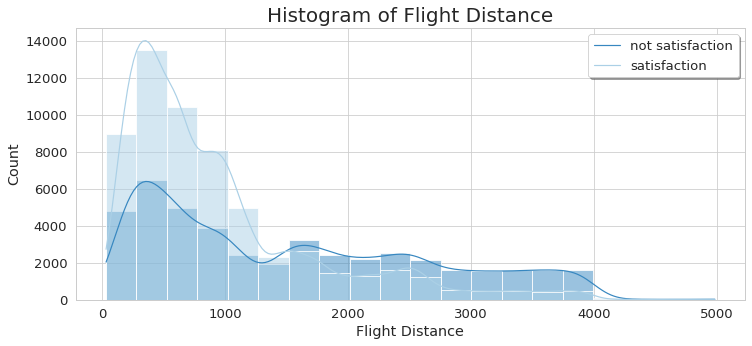

In [30]:
# How does flight distance affect customer satisfaction?

sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
sns.set_context('paper', font_scale=1.5)

sns.histplot(x='Flight Distance', data = df, bins = 20, hue ='satisfaction',palette="Blues", kde = True).set_title('Histogram of Flight Distance',fontsize=20)
plt.legend(['not satisfaction','satisfaction'],shadow = True, loc = 0);

#### Encoding data

The following features: Gender, Customer Type, Type of Travel, and Class are all currently categorical data (dtype: "object"). However, we need to convert it to numerical data in order for our Machine Learning model(s) to be able understand the data. Therefore, I'll do just that using the get_dummies function from pandas.

In [34]:
df['Gender'] = pd.get_dummies(df['Gender'])
df['Customer Type'] = pd.get_dummies(df['Customer Type'])
df['Type of Travel'] = pd.get_dummies(df['Type of Travel'])
df['Class'] = pd.get_dummies(df['Class'])
df['satisfaction'] = pd.get_dummies(df['satisfaction'])
df.dtypes

Gender                                 uint8
Customer Type                          uint8
Age                                    int64
Type of Travel                         uint8
Class                                  uint8
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [36]:
df[["Gender","Customer Type","Type of Travel","Class","satisfaction"]].head()

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,0,1,0,0,1
1,0,0,1,1,1
2,1,1,1,1,0
3,1,1,1,1,1
4,0,1,1,1,0


### To select the most important features in the dataset

In [35]:
from sklearn.feature_selection import SelectKBest, chi2
X = df.loc[:,df.columns!='satisfaction']
y = df[['satisfaction']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')


In [37]:
ss = StandardScaler()
numerical = ['Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes']
# Input features

X = df.loc[:,['Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes']]
X[numerical] = ss.fit_transform(X[numerical])



# Output target
y = df['satisfaction']

In [40]:

# Split the data 80 - 20 train/test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle = True, random_state = 42)

## Logistic Regression

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      9064
           1       0.86      0.87      0.86     11655

    accuracy                           0.84     20719
   macro avg       0.84      0.84      0.84     20719
weighted avg       0.84      0.84      0.84     20719





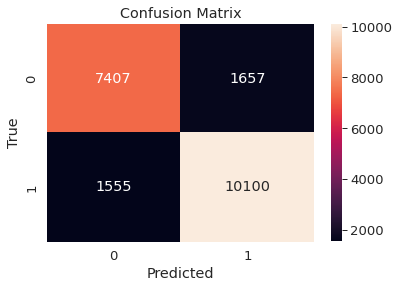

In [41]:
mymodel = LogisticRegression()

penalty = ['l1', 'l2']
C = [0.5, 0.6, 0.7, 0.8,10,100]
solver = ['liblinear', 'saga']

parameters = dict(penalty=penalty, C=C, solver=solver)



gridsearchLog = GridSearchCV(mymodel, parameters, cv = 5)
gridsearchLog.fit(X_train, y_train)

gridsearchLog.best_params_
predictions = gridsearchLog.predict(X_test)



print(classification_report(y_test, predictions))
print('\n')
matrix = confusion_matrix(y_test, predictions)
sns.heatmap(matrix, annot=True, fmt="d");
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('True');

In [42]:
accuracy_score(y_test, predictions)

0.8449732129929051

## Random Forest

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      9064
           1       0.93      0.94      0.94     11655

    accuracy                           0.93     20719
   macro avg       0.93      0.92      0.93     20719
weighted avg       0.93      0.93      0.93     20719





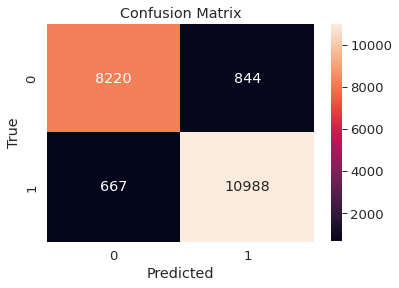

In [43]:
mymodel = RandomForestClassifier()


n_estimators= [200, 500]
max_features= ['auto', 'sqrt', 'log2']
max_depth= [4,5,6,7,8]

parameters=dict(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth )

gridsearchRF = GridSearchCV(mymodel, parameters, cv = 5)
gridsearchRF.fit(X_train, y_train)

gridsearchRF.best_params_
predictions =gridsearchRF.predict(X_test)
#Reporta
print(classification_report(y_test, predictions))
print('\n')
matrix = confusion_matrix(y_test, predictions)
sns.heatmap(matrix, annot=True, fmt="d");
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('True');

In [ ]:
accuracy_score(y_test, predictions)

To show the importance features that affect in the model

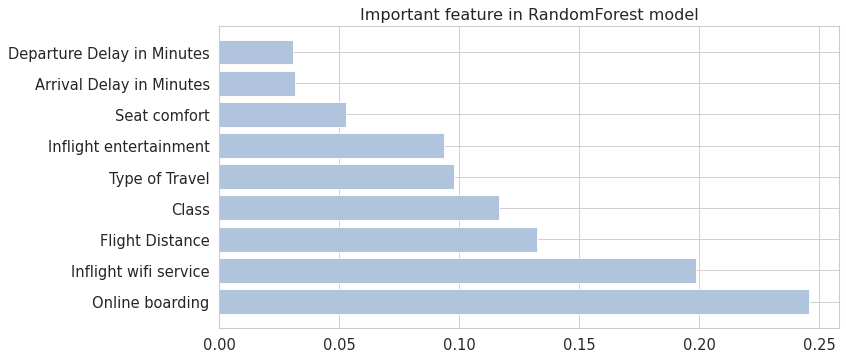

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
model = RandomForestClassifier(n_estimators=100, bootstrap = True,max_features = 'sqrt')

model.fit(X_train, y_train)

fi = pd.DataFrame({'feature': list(X_train),'importance': 
model.feature_importances_}).sort_values('importance', ascending = False)
plt.figure(figsize=(10, 5), dpi=80)
plt.title('Important feature in RandomForest model')
plt.barh(fi['feature'],fi['importance'],color=['lightsteelblue']);

From the above figure, we observed that top 9 features are effected on our target in RandomForest model